# Deep Learning

## HW1- Problem 3 - Regression (100 pts)

### Please fill this part


1.   Full Name: Ehsan Sharifian
2.   Student Number: 400201529


*You are just allowded to change those parts that start with "TO DO". Please do not change other parts.*

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

In [1]:
# You are not allowed to import other packages.

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Part1:
Consider the dataset which has been given to you. Split the dataset into the `training dataset` and `test dataset`. You can use `80%` of the data for training and the rest for testing.

In [30]:
df = pd.read_csv("/content/drive/My Drive/data/data01.csv")

train = df.sample(frac=0.8)
test = df.drop(train.index)

# implement the split part
# name them: x_train, x_test, y_train, y_test

x_train = train['X'].to_numpy()
y_train = train['Y'].to_numpy()

x_test = test['X'].to_numpy()
y_test = test['Y'].to_numpy()

### Part2:
Assume there is simple linear relationship between X and Y. Train a simple `Linear Regression` on the training dataset and report its accuracy on the training and testing dataset, separately.

In [31]:
# here you can implement via sgd or use least square solution. we suggest the second one inv(A^T A) * A^T y.
# consider m as the returned line --> m[0] = the slope , m[1] = y intercept, also don't forget to use numpy for calculating m.
# Building the model

A = np.transpose(np.vstack((x_train, np.ones(len(x_train)))))
m = np.linalg.inv(np.transpose(A) @ A) @ np.transpose(A) @ y_train
print(m)

[-1.02344138  0.8093757 ]


In [32]:
predicted_train_y = m[0] * x_train + m[1]
predicted_test_y = m[0] * x_test + m[1]

train_error = mean_squared_error(y_train, predicted_train_y)
test_error = mean_squared_error(y_test, predicted_test_y)


print(f"MSE train error: {train_error}\nMSE test error: {test_error}")

MSE train error: 0.3367512062769448
MSE test error: 0.30645793206634847


### Part3:
Draw the line you've found in the last part, on train and test points (each separately).

Text(0.5, 1.0, 'Train dataset')

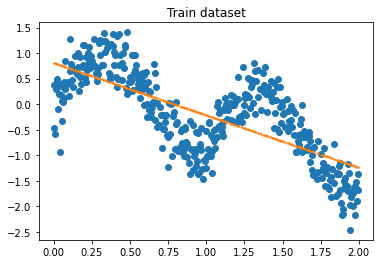

In [33]:
plt.scatter(x_train, y_train)
plt.scatter(x_train, m[0]*x_train + m[1], s=1)
plt.title("Train dataset")

Text(0.5, 1.0, 'Test dataset')

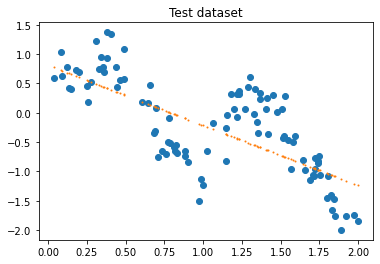

In [34]:
plt.scatter(x_test, y_test)
plt.scatter(x_test, m[0]*x_test + m[1], s=1)
plt.title("Test dataset")

### Part4:
Were the reported accuracies acceptable?

What about the line you drew in the last part?

Was it appropriate for the dataset?
<br><br/>
Explain what are the main problems here.

<div dir="rtl"> <font size="4" face="HM XNiloofar"> 
دقت‌های گزارش شده بسیار نامطلوب است، چرا که محدوده‌ی تغییرات خود داده‌ها زیاد نیست و خطا نسبت به خود داده بزرگ است. خطی که بر داده‌ها برازش شده است نیز به هیچ وجه شکل قابل قبولی برای پراکندگی داده‌ها نیست. این اتفاق به این علت رخ داده که مدل بین متغیر‌ها مدل خطی نیست و مدل کردن خطی به نتایج نامطلوبی می‌انجامد.
</font> </div>

### Part5:
Now, consider the `Locally Weighted Linear Regression` approach for this problem. Do expect it performs better than simple `Linear Regression` for this dataset?

<div dir="rtl"> <font size="4" face="HM XNiloofar"> 
رگرسیون خطی محلی می‌تواند پیچیدگی غیر خطی بین داده‌ها را بسیار بهتر مدل کند، زیرا برای مدل‌های غیر خطی نیز می‌توان در ناحیه‌های کوچک تقریب‌های خطی را جایگزین آن‌ها کرد. در نتیجه پیش از شبیه‌سازی نیز انتظار داریم به نتایج بهتری برسیم.
</font> </div>

### Part6:
Here, we want to implement the `suggested model`. You can implement any weight function you want, the below implementation is just a sample:
<br><br/>
\begin{equation*}
    w^{(i)}=exp\left(-\frac{(\mathbf x^{(i)}-\mathbf x)^\top(\mathbf x^{(i)}-\mathbf x)}{2\tau^2}\right)
\end{equation*}

In [35]:
def get_weight_matrix(the_query_point, train_dataset, hyperparameter):
    l = train_dataset.shape[0]
    W = np.mat(np.eye(l))
    for i, xi in enumerate(train_dataset):
        W[i, i] = np.exp(-((xi - the_query_point) @ np.transpose((xi - the_query_point))) / (2 * (hyperparameter**2)))
    return W

Now implement the `closed form solution` based on the following formula:
<br><br/>
\begin{equation*}
    \boldsymbol\theta=(X^\top WX)^{-1}(X^\top WY)
\end{equation*}
<br><br/>
Of course if you use another form, implement your own.

In [72]:
def predict(train_X, train_Y, query_x, hyperparameter):
    l = train_X.shape[0]
    X = np.transpose(np.vstack((train_X, np.ones(l))))
    qx = np.mat([query_x, 1])
    W = get_weight_matrix(qx, X, hyperparameter)

    theta = np.linalg.inv(X.T @ W @ X) @ X.T @ W @ train_Y

    return np.dot(np.array([query_x, 1]),np.array(theta)[0])

### Part7:
Report accuracy of this model on the test dataset. Also, draw a plot that contains (x_test, y_test) pairs and (x_test, predicted_y) pairs that differ in color.

In [77]:
hyperparameters = np.linspace(0.01, 0.2, num=20)
min_error = 1000
min_hyperparameter = 0.1
for hyperparameter in hyperparameters:
  predicted_test = [predict(x_train, y_train, query, hyperparameter) for query in x_test]
  error = mean_squared_error(y_test, predicted_test)
  if (error < min_error):
    min_error = error
    min_hyperparameter = hyperparameter
predicted_test = [predict(x_train, y_train, query, min_hyperparameter) for query in x_test]
error = mean_squared_error(y_test, predicted_test)
print(f"MSE test error: {error}")

MSE test error: 0.08124364423823861


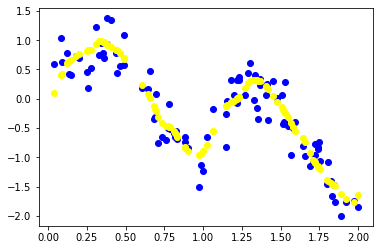

In [79]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_test, c="yellow")

### Part8:
Is the performance of the new model better than the previous one? `Explain`.

<div dir="rtl"> <font size="4" face="HM XNiloofar"> 
بله، مدل جدید از مدل قبلی بهتر کار می‌کند. علت آن است که مدل جدید می‌تواند روابط غیر خطی که بین داده‌ها وجود دارد را مدل کند ولی رگرسیون خطی دارای چنین قابلیتی نیست.
</font> </div>

### Part9:
Now, we want to consider the `KNN` approach for this problem; Do you think it will perform well?

<div dir="rtl"> <font size="4" face="HM XNiloofar"> 
انتظار داریم 
KNN
نیز بتواند غیر خطی بودن بین متغیر‌ها را مدل کند. زیرا صرفا هر داده‌ را بر اساس همسایه‌هاش پیش‌بینی می‌کند. در نتیجه انتظار می‌رود که عملکرد خوبی را نیز در روش 
KNN
شاهد باشیم.
</font> </div>

### Part10:
Implementing the `KNN model`.

In [91]:
class KNN:
    def __init__(self, number_neighbours, X, Y):
        self.k = number_neighbours
        self.X = X
        self.Y = Y

    def distance(self, x1, x2):
        # implement the distance function
        distance = np.sqrt(np.dot(x1-x2,x1-x2))
        return distance

    def return_nn_ids(self, x):
        distances = []
        for i in range(len(self.X)):
          distances.append((self.distance(self.X[i],x), i))


        distances.sort(key= lambda top:top[0])
        # find indices of k nearest neighbours to x
        indices = [x[1] for x in distances[0:self.k]]
        return indices

    def predict(self, x):
        neareest_indices = self.return_nn_ids(x)
        predicted_y = 0
        for near_index in neareest_indices:
          predicted_y += self.Y[near_index]
        predicted_y = predicted_y / self.k
        return predicted_y

In [92]:
def evaluation(k, x_train, y_train, x_test, y_test):
    model = KNN(k, x_train, y_train)
    predicted_y = [model.predict(x) for x in x_test]
    error = mean_squared_error(y_test, predicted_y)
    return error, predicted_y

In [93]:
k = 7
error_knn, predicted_y = evaluation(k, x_train, y_train, x_test, y_test)
print(f"MSE error of KNN for test dataset: {error_knn}")

MSE error of KNN for test dataset: 0.08574346690799167


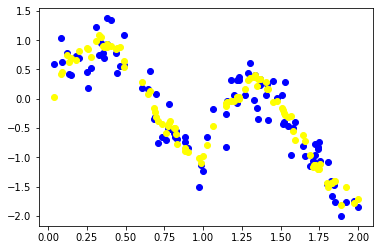

In [94]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_y, c="yellow")

To find best K for this algorithm we suggest to use cross-validation.
<br><br/>
Did this model perform well (due to the plot and test accuracy)?

<div dir="rtl"> <font size="4" face="HM XNiloofar"> 
بر اساس دقت تست و نموداری که داده‌های پیش‌بینی شده دارند، مدل به خوبی توانسته بر داده‌ها فیت شود و پیش‌بینی قابل قبولی از 
y
بر حسب 
x
داشته باشد.
</font> </div>